# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.

https://github.com/facebookresearch/detectron2


# Install detectron2

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 274 kB 7.2 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-macosx_10_9_x86_64.whl size=44079 sha256=ee54fb2c57edc2002eacd7df7063f27868ddcdcfcad14bae90aeddd10c237cef
  Stored in directory: /Users/jensenwong/Library/Caches/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1
distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
1.8.1 False
Configured with: --prefix

In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [5]:
conda install detectron2

Solving environment: done

## Package Plan ##

  environment location: /Users/jensenwong/miniforge_x86_64/envs/py38int

  added / updated specs:
    - detectron2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       he69c4ee_4         359 KB  conda-forge
    cairo-1.16.0               |    he43a7df_1008         1.3 MB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    cython-0.29.23             |   py38ha048514_0         2.0 MB  conda-forge
    detectron2-0.4             |   py38ha048514_2         922 KB  conda-forge
    expat-2.3.0                |       he49afe7_0         131 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB 

lz4-c-1.9.3          | 155 KB    | ##################################### | 100% 
lcms2-2.12           | 404 KB    | ##################################### | 100% 
font-ttf-ubuntu-0.83 | 1.9 MB    | ##################################### | 100% 
gdk-pixbuf-2.42.6    | 579 KB    | ##################################### | 100% 
pillow-8.1.2         | 657 KB    | ##################################### | 100% 
libtiff-4.2.0        | 623 KB    | ##################################### | 100% 
cython-0.29.23       | 2.0 MB    | ##################################### | 100% 
libgd-2.3.2          | 241 KB    | ##################################### | 100% 
pcre-8.44            | 220 KB    | ##################################### | 100% 
portalocker-1.7.0    | 19 KB     | ##################################### | 100% 
font-ttf-dejavu-sans | 388 KB    | ##################################### | 100% 
future-0.18.2        | 715 KB    | ##################################### | 100% 
zstd-1.4.9           | 460 K

In [2]:
pip install fvcore 

distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.4 requires omegaconf>=2, which is not installed.
detectron2 0.4 requires fvcore<0.1.4,>=0.1.3, but you have fvcore 0.1.5.post20210511 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install omegaconf

distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8/UNKNOWN
sysconfig: /Users/jensenwong/miniforge_x86_64/envs/py38int/include/python3.8
user = False
home = None
root = None
prefix = None
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.4 requires fvcore<0.1.4,>=0.1.3, but you have fvcore 0.1.5.post20210511 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


# Start from here

In [212]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
import matplotlib.pyplot as plt
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from PIL import Image

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [213]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    plt.axis(False)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [214]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75  # set threshold for this model
cfg.MODEL.DEVICE = 'cpu'
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)


In [215]:
def detect_object(image):
    outputs = predictor(image)

    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=.5)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    image_with_label = out.get_image()[:, :, ::-1]

    mask = outputs["instances"].pred_masks.to("cpu").numpy()
    mask = mask.astype(int)
    mask=np.moveaxis(mask, 0, -1)
    boxes=outputs["instances"].pred_boxes.tensor.cpu().numpy()
    boxes = boxes.astype(int)

    class_no = outputs["instances"].pred_classes.tolist()
    scores = outputs["instances"].scores.tolist()
    class_name = []
    for i, _ in enumerate(class_no):
        class_name.append(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[_] + " "
                          + str(round(scores[i] * 100)) + '%')

    output_list = []

    for i in range(mask.shape[2]):
        temp = image.copy()
        for j in range(temp.shape[2]):
          temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
          (x, y, w, h) = (boxes[i][0], boxes[i][1],boxes[i][2]-boxes[i][0], boxes[i][3]-boxes[i][1])
          temp_nobg=temp[y:y+h,x:x+w]+255
        output_list.append(temp_nobg)
    
    return(image_with_label, class_name, output_list)

In [220]:
image = cv2.cvtColor(cv2.imread('data/chair.jpg'), cv2.COLOR_BGR2RGB)
image_with_label, class_name, output_list = detect_object(image)

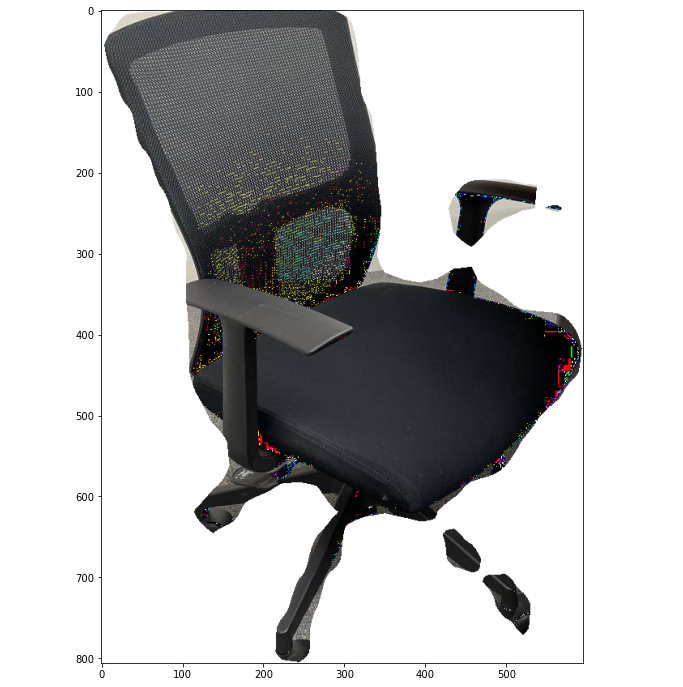

In [221]:
display_img(output_list[0])